In [9]:
from  matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5)
import numpy as np
from src.utils import Hamiltonian as H

# Standard eigenvalue solvers

We define a  symmetric matrix  $H\in {\mathbb{R}}^{2\times 2}$

$$
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{21} & H_{22}
\end{bmatrix},
$$

We  let $H = H_0 + H_I$, where

$$
H_0= \begin{bmatrix} E_1 & 0 \\ 0 & E_2\end{bmatrix},
$$

is a diagonal matrix. Similarly,

$$
H_I= \begin{bmatrix} V_{11} & V_{12} \\ V_{21} & V_{22}\end{bmatrix},
$$

where $V_{ij}$ represent various interaction matrix elements.

We can view $H_0$ as the non-interacting solution

$$
H_0\vert 0 \rangle =E_1\vert 0 \rangle,
$$

and

$$
H_0\vert 1\rangle =E_2\vert 1\rangle,
$$

where we have defined the orthogonal computational one-qubit basis states $\vert 0\rangle$ and $\vert 1\rangle$.

We rewrite $H$ (and $H_0$ and $H_I$)  via Pauli matrices

$$
H_0 = \mathcal{E} I + \Omega \sigma_z, \quad \mathcal{E} = \frac{E_1
  + E_2}{2}, \; \Omega = \frac{E_1-E_2}{2},
$$

and

$$
H_I = c \boldsymbol{I} +\omega_z\sigma_z + \omega_x\sigma_x,
$$

with $c = (V_{11}+V_{22})/2$, $\omega_z = (V_{11}-V_{22})/2$ and $\omega_x = V_{12}=V_{21}$.

We let our Hamiltonian depend linearly on a strength parameter $\lambda$

$$
H=H_0+\lambda H_\mathrm{I},
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively.  The model is an eigenvalue problem with only
two available states.

Here we set the parameters $E_1=0$,
$E_2=4$, $V_{11}=-V_{22}=3$ and $V_{12}=V_{21}=0.2$.

The non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $\lambda\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $\lambda=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $\lambda\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $V_{12}$ represents the strength of the coupling
between the two states.

*Note: from https://github.com/CompPhysics/QuantumComputingMachineLearning/blob/gh-pages/doc/Projects/2023/Project1/pdf/Project1.pdf*

## Numerical solution by a standard eigenvalue solver

First we define the parameters and calculate the constans using Python:

In [10]:
# Define the parameters
E1 = 0.0
E2 = 4.0
V11 = -3.0 # X diag
V22 = 3.0 # X diag
V12 = V21 = 0.2 # X non-diag

We can write a Python script using numpy to create the matrix $H$ as a function of the parameter $\lambda$, and then use numpy's function `numpy.linalg.eig()` to find its eigenvalues and eigenvectors:

Note: Code is a edited version of the code found here: https://github.com/CompPhysics/QuantumComputingMachineLearning/blob/gh-pages/doc/pub/week11/ipynb/week11.ipynb

In [11]:
# number of dimensions
dim = 2

# setting up the Hamiltonian
Hamiltonian = np.zeros((dim, dim))
Hamiltonian[0,0] = V22 + E1
Hamiltonian[0,1] = V12
Hamiltonian[1,0] = Hamiltonian[0, 1]
Hamiltonian[1,1] = E2 + V11

# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]

# print only the lowest eigenvalue
print(EigValues[0])

0.9801960972814431


This can also be rewritten in the terms of the identity matrix ($I$) and the Pauli matrix $X$ and $Z$

In [12]:
# Identity matrix
I = np.eye(2)

# Pauli matrices
SIGMA_X = np.array([[0, 1], [1, 0]])
SIGMA_Y = np.array([[0, -1j], [1j, 0]])
SIGMA_Z = np.array([[1, 0], [0, -1]])

# Calculate the constants
EPSILON = (E1 + E2) / 2
OMEGA = (E1 - E2) / 2
C = 0.0

OMEGA_Z = V22
OMEGA_X = V12

In [13]:
Hamiltonian = (EPSILON + C) * I + (OMEGA_Z + OMEGA) * SIGMA_Z + OMEGA_X * SIGMA_X

EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]

# print only the lowest eigenvalue
print(EigValues[0])

0.9801960972814431


## The behavior of the eigenstates as functions of the interaction strenght

We can compute the eigenvalues as a function of the interaction strength $\lambda$ and study their behavior by plotting them.

Let's consider a range of $\lambda$ values from 0 to 1, calculate the eigenvalues for each $\lambda$ and plot the results.

In [14]:
# Function to calculate the Hamiltonian

def Hamiltonian2S(lmb):
    """
    Returns a Hamiltonian matrix for given parameters.

    Parameters
    ----------
    lmb : float
        Lambda parameter of the Hamiltonian.

    Returns
    -------
    numpy array
        The Hamiltonian matrix.
    """

    eps = (E1 + E2) / 2
    omega = (E1 - E2) / 2
    
    c = (V11 + V22) / 2
    omega_z = (V11 - V22) / 2
    omega_x = V12

    H0 = eps * I + omega * SIGMA_Z
    H1 = c * I + omega_z * SIGMA_Z + omega_x * SIGMA_X
    
    return H0 + lmb * H1

In [15]:
# Set up the arrays for lambda values and eigenvalues
lmbvalues_ana = np.arange(0, 1, 0.01)
eigvals_ana = np.zeros((len(lmbvalues_ana), 2))

# Loop over all lambda values and diagonalize the Hamiltonian
for index, lmb in enumerate(lmbvalues_ana):
    eigen, eigvecs = np.linalg.eig(H(lmb)) #using the imported Hamiltonian function
    permute = eigen.argsort()
    eigvals_ana[index] = eigen[permute]
    eigvecs = eigvecs[:,permute]

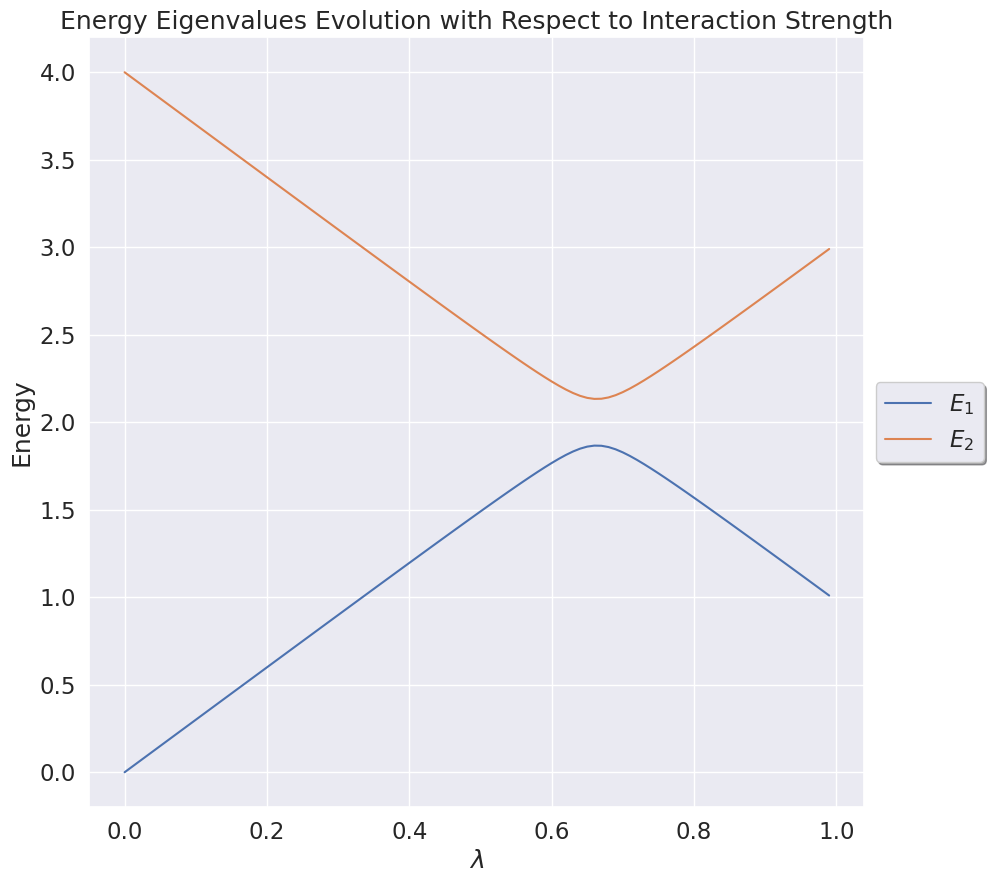

In [16]:
# Plot the results
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

for i in range(2):
    axs.plot(lmbvalues_ana, eigvals_ana[:,i], label=f'$E_{i+1}$')

axs.set_xlabel(r'$\lambda$')
axs.set_ylabel('Energy')
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True, ncol=1)
plt.title('Energy Eigenvalues Evolution with Respect to Interaction Strength')
axs.grid(True)
plt.show()

In this script, we first compute the eigenvalues for a range of $\lambda$ values. We then transpose the list of eigenvalues, which gives us two lists - one for each eigenvalue. Finally, we plot these eigenvalues as functions of $\lambda$.

The resulting plot will gives a visual representation of how the eigenvalues of the Hamiltonian $H$ change as the interaction strength $\lambda$ changes.